# Hands On Instrument Data Selection and Binning

This notebook teaches how to deal with DL3 data from current IACTs and other HE or VHE instruments. The Data Level 3 (DL3) format is described here 

Please refer to [this notebook](https://github.com/arqus-gamma/arqus_school_2022/blob/main/hands_on/1_read_data/Read_data_with_astropy_hands_on.ipynb) for preliminary introduction

The Cherenkov Telescope Array (CTA) is the next generation ground-based observatory for gamma-ray astronomy. Gammapy is the core library for the Cherenkov Telescope Array (CTA) science tools (2017ICRC…35..766D and CTAO Press Release).

Tutorial overview
This notebook shows how to access CTA data and instrument response functions (IRFs) using Gammapy, and gives some examples how to quick look the content of CTA files, especially to see the shape of CTA IRFs.

At the end of the notebooks, we give several links to other tutorial notebooks that show how to simulate CTA data and how to evaluate CTA observability and sensitivity, or how to analyse CTA data.

Note that the FITS data and IRF format currently used by CTA is the one documented at https://gamma-astro-data-formats.readthedocs.io/, and is also used by H.E.S.S. and other imaging atmospheric Cherenkov telescopes (IACTs). So if you see other Gammapy tutorials using e.g. H.E.S.S. example data, know that they also apply to CTA, all you have to do is to change the loaded data or IRFs to CTA.



## Initial Setup

As usual, we start by installing some standards packages. We try to be minimal and install only those stricly required.
Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [5]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import astropy
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
# from astropy.time import Time
from astropy.table import Table
from astropy.io import fits
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.wcs import WCS


print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.22.3
astropy: 5.0.4


In [47]:
import regions
from regions import CircleSkyRegion, PointSkyRegion

However, in most cases, remember that for analyzing specific instruments' data, often additional packages are to be installed, that are somewhat specific of the instrument. In many cases, they are tailored functions

In [46]:
import gammapy
from gammapy.data import Observation, Observations, DataStore, EventList
from gammapy.makers import SafeMaskMaker, MapDatasetMaker, SpectrumDatasetMaker, ReflectedRegionsBackgroundMaker, WobbleRegionsFinder
from gammapy.irf import EffectiveAreaTable2D, load_cta_irfs


# dataset modules
from gammapy.datasets import (
    MapDataset, 
    MapDatasetOnOff, 
    MapDatasetEventSampler,
    SpectrumDatasetOnOff,
    SpectrumDataset, 
    Datasets,
    FluxPointsDataset
)

print("gammapy:", gammapy.__version__)

gammapy: 0.20.1


## 1. Data Sample


In [2]:
!ls ../../data/

README.md          download_data.sh   ngc1275
arqus_filelist.txt ic310              old
crab_nebula        mrk421             pks2155


In [ ]:
#!ls ../../data/crab_nebula/magic
#!ls ../../data/pks2155/hess/
#!ls ../../data/ic310/magic
!ls ../../data/ngc1275/magic

ls: ../../data/ngc1275/magic: No such file or directory


In [49]:
import os
from pathlib import Path
os.environ["CALDB"] = os.environ["GAMMAPY_DATA"] + "../../data/ngc1275/magic/"




In [50]:
#radmax = fits_file['RAD_MAX']
#Table(radmax.data['RAD_MAX'][0])

In [79]:
datastore = DataStore.from_dir(f"../../data/ngc1275/magic/")
obs_ids = [5059487]
#obs_ids = [5059487,5059488,5059489]
#obs_ids = [5059487,5059488,5059489,5059490,5059497,5059498,5059499,5059500]
datastore.get_observations(obs_ids)
datastore.info()

Skipping run with missing HDUs; Required HDUs ['psf', 'bkg'] not found in observation 5059487


Data store:
HDU index table:
BASE_DIR: ../../data/ngc1275/magic
Rows: 805
OBS_ID: 5056191 -- 5065842
HDU_TYPE: ['aeff', 'edisp', 'events', 'gti', 'rad_max']
HDU_CLASS: ['aeff_2d', 'edisp_2d', 'events', 'gti', 'rad_max_2d']


Observation table:
Observatory name: 'N/A'
Number of observations: 161



In [80]:
datastore.obs_table

OBS_ID,RA_PNT,DEC_PNT,TSTART,TSTOP,DEADC
,deg,deg,s,s,
int64,float32,float32,float32,float32,float32
5059566,49.66667,41.17139,436317900.0,436318900.0,0.9840961
5057942,49.45417,41.66806,430638800.0,430639200.0,0.9537472
5058192,50.22917,41.85111,431394500.0,431395700.0,0.9848278
5059562,49.66667,41.17139,436312700.0,436313600.0,0.9867498
5057929,49.66667,41.17139,430626800.0,430627700.0,0.9853436
...,...,...,...,...,...
5059613,49.45417,41.66806,436399100.0,436400300.0,0.9895535
5057236,50.4375,41.35305,428214200.0,428215100.0,0.9850262


In [81]:
#If you can’t download the index files, or got errors related to the data access using them, you can generate the DataStore directly from the event files.

#path = Path(os.environ["GAMMAPY_DATA"]) / "cta-1dc/data"
#paths = list(path.rglob("*.fits"))
#data_store = DataStore.from_events_files(paths)
#print(data_store)

In [88]:
# how to find what is observations?
observations = datastore.get_observations(obs_ids)
#observations.__dict__.keys()
observations

Skipping run with missing HDUs; Required HDUs ['psf', 'bkg'] not found in observation 5059487


IndexError: list index out of range

In [67]:
# not working as from GAMMAPY EXAMPLE
#observation = datastore.obs(5057929)
#observation

In [83]:
# also not working as suggested instead
events1 = observations.events

AttributeError: 'Observations' object has no attribute 'events'

In [78]:
observations = datastore.get_observations(obs_ids)
observations.info()

/Users/mdoro/Soft/anaconda3/envs/gammapy-0.20/lib/python3.8/site-packages/astropy/table/column.py:330: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


ValueError: OBS_ID = 5 not in HDU index table.

In [39]:
events = EventList.read("../../data/ngc1275/magic/20170101_05059487_DL3_NGC1275-W0.40+157.fits")
events
events.table[:5]
#events.peek()

EVENT_ID,TIME,RA,DEC,ENERGY,GAMMANESS,DETX,DETY
,s,deg,deg,TeV,,mm,mm
int64,float64,float32,float32,float32,float32,float32,float32
117,436139121.599158,49.01414,41.539272,0.10293761,0.9410159,0.3199254,-0.13709812
138,436139121.66326886,48.04316,42.417595,0.06289925,0.41138095,1.0475081,0.7366911
210,436139121.89286935,49.00081,41.941536,0.040962473,0.24814683,0.33467507,0.2649405
233,436139121.9688521,48.99533,41.803627,0.034511823,0.32546824,0.33711714,0.12696764
337,436139122.25264156,49.906765,42.391163,0.05785944,0.7387659,-0.32914373,0.7258594


In [ ]:
from gammapy.data import EventList
filename = '$GAMMAPY_DATA/hess-dl3-dr1/data/hess_dl3_dr1_obs_id_023523.fits.gz'
events = EventList.read(filename)
events.peek()

In [76]:
observations.available_hdus

AttributeError: 'Observations' object has no attribute 'available_hdus'

In [100]:
# Select events based on energy
selected_energy = events.select_energy([1*u.TeV, 1.2*u.TeV])

# Select events based on time
t_start = Time(57185, format='mjd')
t_stop = Time(57185.5, format='mjd')

selected_time = events.select_time([t_start, t_stop])

# Select events based on offset
#selected_offset = events.select_offset([1*u.deg, 2*u.deg])

# Select events from a region in the sky
#selected_region =  events.select_region("icrs;circle(86.3,22.01,3)")

# Finally one can select events based on any other of the columns of the `EventList.table`
#selected_id = events.select_parameter('EVENT_ID', (5407363826067,5407363826070))

In [104]:
from gammapy.data import EventList, GTI

filename_1 = '../../data/ngc1275/magic/20170101_05059487_DL3_NGC1275-W0.40+157.fits'
filename_3 = '../../data/ngc1275/magic/20170101_05059489_DL3_NGC1275-W0.40+058.fits'
filename_2 = '../../data/ngc1275/magic/20170101_05059488_DL3_NGC1275-W0.40+337.fits'
filename_4 = '../../data/ngc1275/magic/20170101_05059490_DL3_NGC1275-W0.40+238.fits'

events_1 = EventList.read(filename_1)
events_2 = EventList.read(filename_2)
events_3 = EventList.read(filename_3)
events_4 = EventList.read(filename_4)


gti_1 = GTI.read(filename_1)
gti_2 = GTI.read(filename_2)
gti_3 = GTI.read(filename_3)
gti_4 = GTI.read(filename_4)

# stack in place, now the _1 object contains the information of both
#gti_1.stack(gti_2)
#gti_1.stack(gti_3)
#gti_1.stack(gti_4)
#events_1.stack(events_2)
#events_1.stack(events_3)
#events_1.stack(events_4)

# or instead create a new event list from the other two
combined_events = EventList.from_stack([events_1, events_2, events_3, events_4])

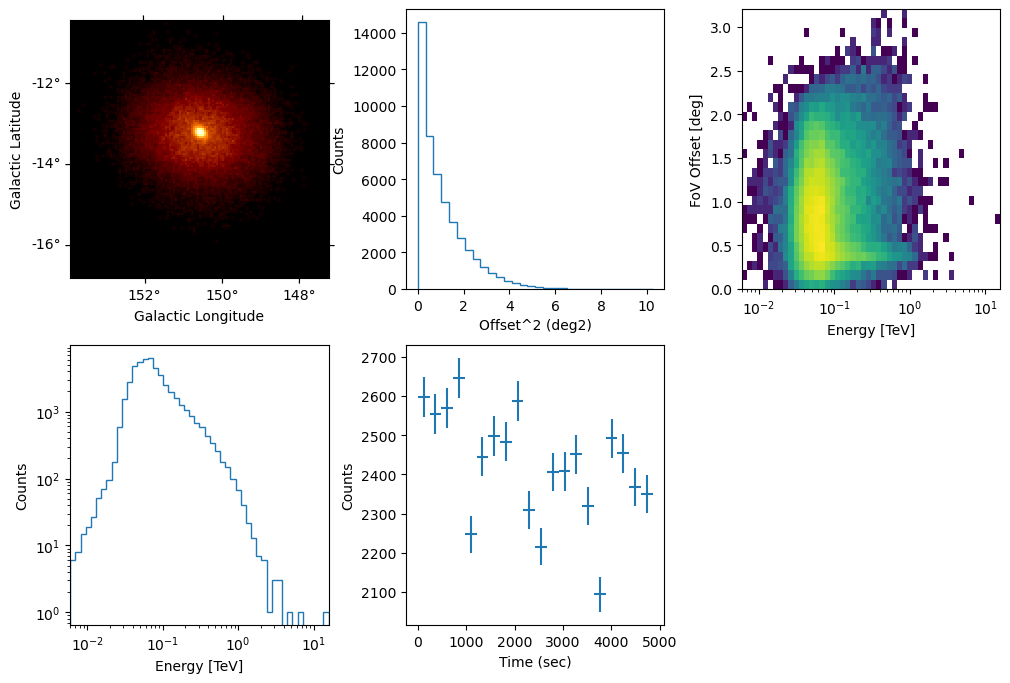

In [105]:
combined_events.peek()

In [125]:
combined_events.galactic.b

<Latitude [-13.6208404 , -13.2631584 , -13.28758602, ..., -13.94228152,
           -14.20817284, -14.82580352] deg>

In [63]:
rad_max = obs_ngc1275["5059487"].rad_max
rad_max

In [8]:
obs_ngc1275 = datastore.get_observations(obs_ids, required_irf='point-like')
print(obs_ngc1275)

Observations
Number of observations: 2
Observation

	obs id            : 5059487 
 	tstart            : 57753.91
	tstop             : 57753.92
	duration          : 1216.00 s
	pointing (icrs)   : 49.5 deg, 41.7 deg

	deadtime fraction : 1.2%
Observation

	obs id            : 5059488 
 	tstart            : 57753.92
	tstop             : 57753.93
	duration          : 1184.00 s
	pointing (icrs)   : 50.4 deg, 41.4 deg

	deadtime fraction : 1.4%



In [57]:
pos = SkyCoord.from_name("NGC1275")
pos.data.lat


<Latitude 41.5116969 deg>

In [56]:
obs_ngc1275 = datastore.get_observations(obs_ids, required_irf=["aeff", "edisp", "rad_max"]
)
print(obs_ngc1275)

Observations
Number of observations: 2
Observation

	obs id            : 5059487 
 	tstart            : 57753.91
	tstop             : 57753.92
	duration          : 1216.00 s
	pointing (icrs)   : 49.5 deg, 41.7 deg

	deadtime fraction : 1.2%
Observation

	obs id            : 5059488 
 	tstart            : 57753.92
	tstop             : 57753.93
	duration          : 1184.00 s
	pointing (icrs)   : 50.4 deg, 41.4 deg

	deadtime fraction : 1.4%



In [59]:
obs_ngc1275[0].aeff.meta

OrderedDict([('EXTNAME', 'EFFECTIVE AREA'),
             ('HDUCLASS', 'GADF'),
             ('HDUDOC',
              'https://github.com/open-gamma-ray-astro/gamma-astro-data-formats'),
             ('HDUVERS', '0.2'),
             ('HDUCLAS1', 'RESPONSE'),
             ('HDUCLAS2', 'EFF_AREA'),
             ('HDUCLAS3', 'POINT-LIKE'),
             ('HDUCLAS4', 'AEFF_2D'),
             ('CREF5', '(ENERG_LO:ENERG_HI,THETA_LO:THETA_HI)'),
             ('OBS_ID', 5059487),
             ('LO_THRES', 0.0786337)])

In [79]:
target_position = SkyCoord(ra=pos.data.lon, dec=pos.data.lat, unit="deg", frame="icrs")

theta = obs_ngc1275[0].rad_max
assert all(o.rad_max == theta for o in obs_ngc1275)

on_region_radius = Angle(theta.data*u.deg)
on_region_radius.to('rad')
on_region = CircleSkyRegion(center=target_position, radius=on_region_radius)

skydir = target_position.galactic

ValueError: 'radius' must be a scalar

# OLD STUFF

In [ ]:
en_s1  = evt1['ENERGY']
t_s1   = evt1['TIME']
ra_s1  = evt1['RA']
dec_s1 = evt1['DEC']
g_s1   = evt1['GAMMANESS']

In [ ]:
en_s2  = evt2['ENERGY']
t_s2   = evt2['TIME']
ra_s2  = evt2['RA']
dec_s2 = evt2['DEC']
g_s2   = evt2['GAMMANESS']

In [ ]:
en_s3  = evt3['ENERGY']
t_s3   = evt3['TIME']
ra_s3  = evt3['RA']
dec_s3 = evt3['DEC']
g_s3   = evt3['GAMMANESS']

In [ ]:
# Direction of the events
plt.plot(dec,ra,marker='s', markersize='0.2',linewidth='0',alpha=0.5, label="all")
plt.plot(dec_s1,ra_s1,marker='o', markersize='2',linewidth='0',alpha=0.5, label="Low Energy")
plt.plot(dec_s2,ra_s2,marker='o', markersize='2',linewidth='0',alpha=0.5, label="High Energy")
plt.plot(dec_s3,ra_s3,marker='o', markersize='2',linewidth='0',alpha=0.5, label="Gammaness > 0.95")
plt.plot(dec_obj,ra_obj, marker="*", markersize="12",linewidth='0', label="Object Sky coordinate")
plt.plot(dec_pnt,ra_pnt, marker="x", color = 'black', markersize="10", linewidth='0', label="Observed coordinate")
plt.xlabel('Dec [deg]')
plt.ylabel('RA [deg]')
plt.title('Sky Event Distribution')
plt.legend(loc="best")

In [ ]:
# Direction of the events
plt.plot(dec,ra,marker='s', markersize='0.2',linewidth='0',alpha=0.6, label="all")
plt.plot(decsel,rasel,marker='s', markersize='0.4',linewidth='0',label="selected")
plt.xlabel('Dec [deg]')
plt.ylabel('RA [deg]')
plt.legend(loc="best")

In [ ]:
# Direction of the events
plt.plot(dx,dy,marker='s', markersize='0.2',linewidth='0')
